<a href="https://colab.research.google.com/github/tmkhang1999/2022-NYC-Airbnb-Analytics/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

# 2. Loading the dataset

## 2.1. A look at listing data

In [ ]:
# Use pandas to load the data from csv.gz file
listing_df = pd.read_csv('listings.csv.gz', compression='gzip')

In [8]:
# Looking into the first 5 rows
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,NaN,f,1,1,0,0,1.13


In [79]:
# Check the length of list and the number of features
listing_df.shape

(41533, 75)

In [80]:
# Check the features
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            41533 non-null  int64  
 1   listing_url                                   41533 non-null  object 
 2   scrape_id                                     41533 non-null  int64  
 3   last_scraped                                  41533 non-null  object 
 4   source                                        41533 non-null  object 
 5   name                                          41520 non-null  object 
 6   description                                   40747 non-null  object 
 7   neighborhood_overview                         24089 non-null  object 
 8   picture_url                                   41533 non-null  object 
 9   host_id                                       41533 non-null 

In [11]:
# After looking into the features of the data, I have splitted these to different
# groups for data analysis

# ID info
id_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source']

# Description
des_cols = ['name', 'description', 'neighborhood_overview', 'picture_url']

# Host Info
host_cols = ['host_id', 'host_url', 'host_name', 'host_since',
            'host_location', 'host_about', 'host_response_time',
            'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
            'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
            'host_listings_count', 'host_total_listings_count',
            'host_verifications', 'host_has_profile_pic', 
            'host_identity_verified', 'calculated_host_listings_count',
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms']

# Location Info
loc_cols = ['neighbourhood', 'neighbourhood_cleansed',
           'neighbourhood_group_cleansed', 'latitude', 'longitude']

# Apartment Info
apt_cols = ['property_type', 'room_type', 'accommodates',
           'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities']

# Length of stay Info
night_cols = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights',
              'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm']

# Price Info
price_cols = ['price']

# Availability Info
aval_cols = ['calendar_updated', 'has_availability',
             'availability_30', 'availability_60', 'availability_90',
             'availability_365', 'calendar_last_scraped']

# Reviews
rev_cols = ['number_of_reviews',
            'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
            'last_review', 'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month']

# Booking Info
book_cols = ['license', 'instant_bookable']

# Useful columns
possible_cols = ['name', 'description', 'host_id', 'host_name', 'host_is_superhost', 
                 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                 'latitude', 'longitude', 'room_type', 'accommodates', 
                 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
                 'minimum_nights', 'maximum_nights', 'availability_365', 
                 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 
                 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 
                 'review_scores_location', 'review_scores_value', 
                 'calculated_host_listings_count']

# 3. Data Cleaning

## 3.1. Checking the NaN values

Text(0.5, 1.0, 'The percentage of missing values by columns')

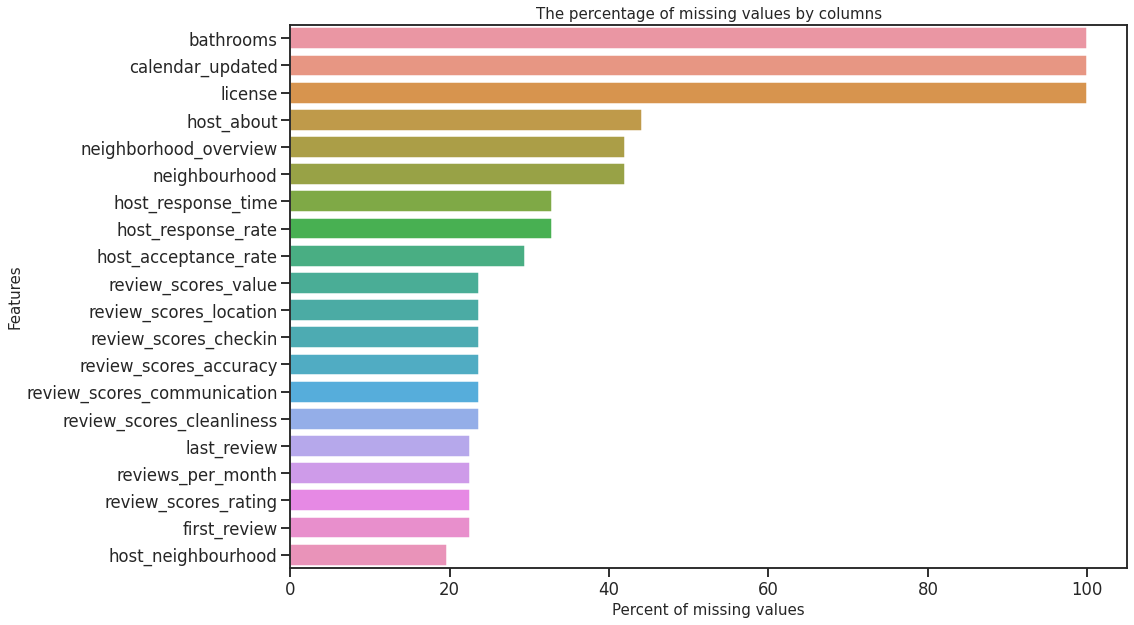

In [82]:
# Calculate the percentage of the missing values in each column, then put it
# into a data frame
listing_df_na = (listing_df.isnull().mean()) * 100
listing_df_na = listing_df_na.drop(listing_df_na[listing_df_na == 0].index)
listing_df_na = listing_df_na.sort_values(ascending=False)[0:20]

# Setting figure size
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=listing_df_na, y=listing_df_na.index)

# Custom the chart
sns.set(style='ticks', context='talk')
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('The percentage of missing values by columns', fontsize=15)

## 3.2. Drop unwanted columns

In [12]:
def general_clean(df, missing_rate=0.75, useful_vals=list()):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    missing_rate - the acceptable missing value percentage
    useful_vals - the useful columns for our data analysis
    
    OUTPUT:
    new_df - a cleaner data set
    '''
    # Extract the useful columns
    df = df[useful_vals]

    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Drop the features with the missing value rate above 75%
    df_na = df.isnull().mean()
    df = df.drop(df_na[df_na > missing_rate].index, axis=1)

    # Drop columns with a single value
    for col in df.columns:
      if len(df[col].unique()) == 1:
        df = df.drop(col,axis=1)

    return df

In [13]:
listing_df = general_clean(df=listing_df, useful_vals=possible_cols)

## 3.3. Some Transformations

In [14]:
def clean_price(x):
    '''
    INPUT:
    x - a string holding the price value
    
    OUTPUT:
    x_clean - x is cleaned by removing '$', ',', and is saved as float
    '''
    try:
        x_clean =float(x.replace('$', '').replace(',', ''))
        return x_clean
    except:
        return x

In [15]:
listing_df['price'] = listing_df['price'].apply(lambda x: clean_price(x))

In [16]:
# Convert all values in description to string
listing_df['description'] = listing_df['description'].astype('str')

# 4. Data Visualization

## 4.1. Hosts with the most listings in NYC

In [114]:
# Extract the top 10 host info, then save into a dataframe named 'top_host_vals'
top_host_vals = listing_df['host_id'].value_counts().head(10).reset_index(name="count")
top_host_vals['index'] = top_host_vals['index'].astype('str')
top_host_vals

,index,count
0,107434423,487
1,3223938,345
2,305240193,214
3,158969505,200
4,19303369,196
5,200239515,175
6,22541573,172
7,204704622,166
8,51501835,130
9,174792040,130


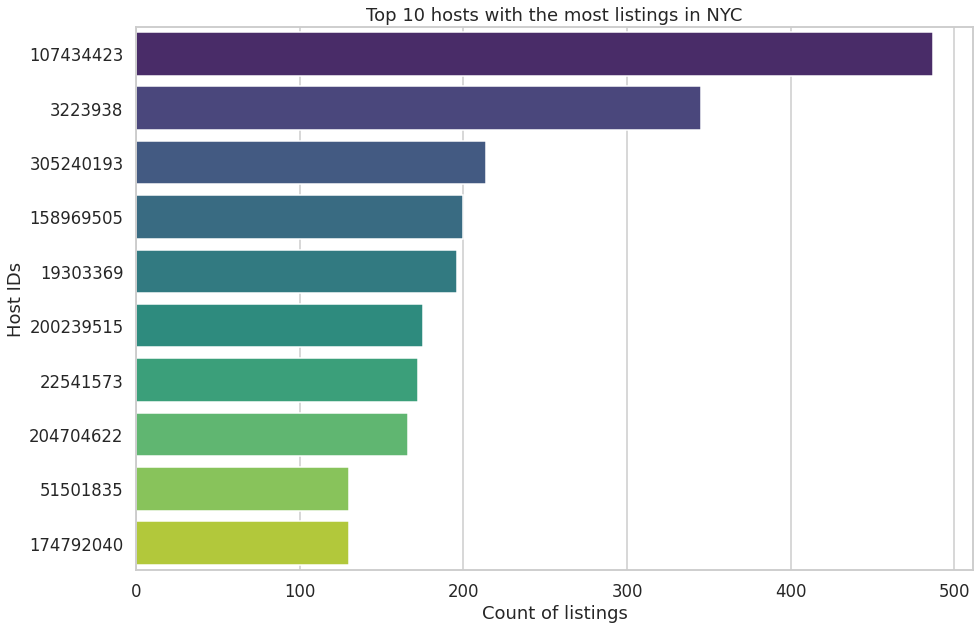

In [119]:
# Setting figure
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid', context='talk')

# Custom the chart
viz_1 = sns.barplot(x="count", y="index", data=top_host_vals, palette='viridis')
viz_1.set_title('Top 10 hosts with the most listings in NYC')
viz_1.set_ylabel('Host IDs')
viz_1.set_xlabel('Count of listings');

## 4.2. Top 10 most frequent neighborhoods in each borough

In [17]:
# Extract the infomation of top 10 most frequent neighborhoods in each borough in NYC
data_2 = listing_df.groupby(['neighbourhood_group_cleansed'])['neighbourhood_cleansed'].value_counts().reset_index(name='frequency')
data_2 = data_2.groupby(['neighbourhood_group_cleansed']).head(15)

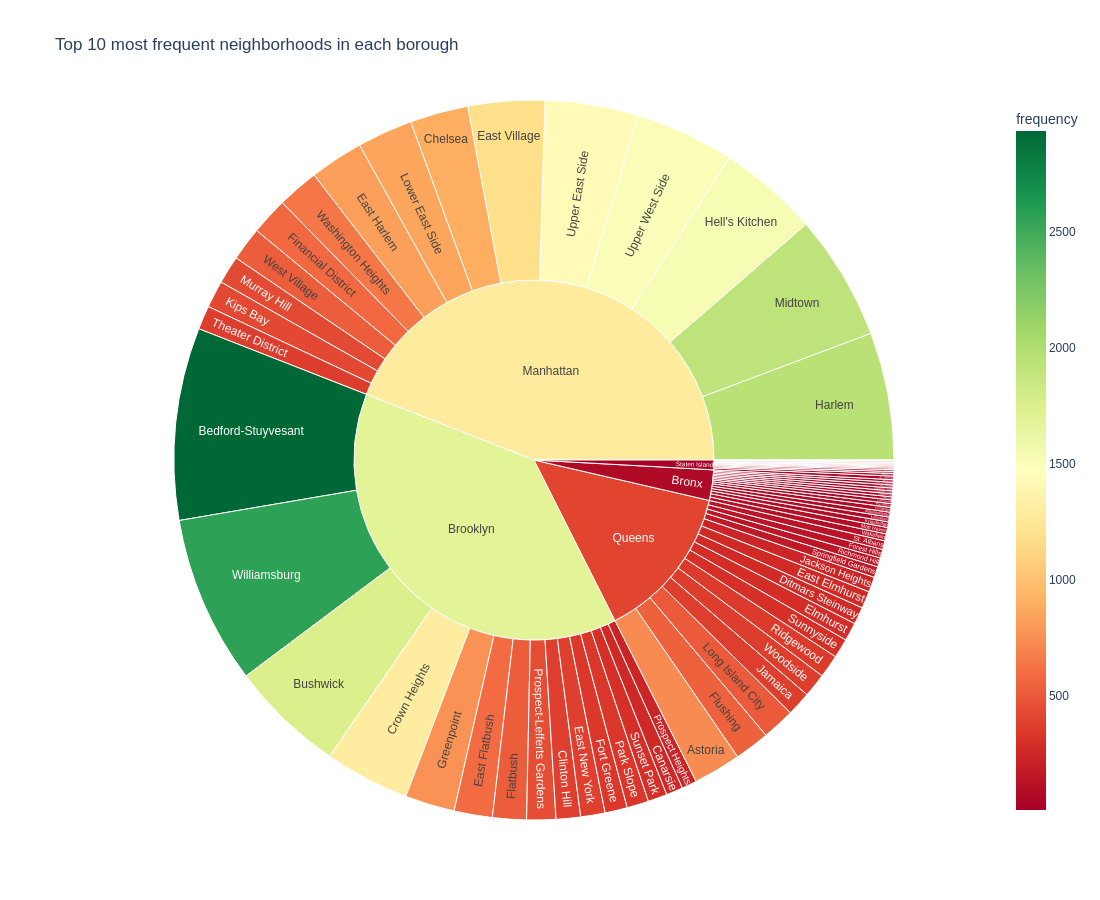

In [21]:
# Set up the sunburst chart
viz_2 = px.sunburst(data_2,
                    path=['neighbourhood_group_cleansed', 'neighbourhood_cleansed'],
                    width=1100, height=900,
                    values='frequency',
                    color_continuous_scale="RdYlGn",
                    color='frequency',
                    title='Top 10 most frequent neighborhoods in each borough')
viz_2.show('png')

# 5. Word Cloud

# 6. Regression Analysis